# Company - Code Clause

### Name: Pawaskar Karishma

### Task2: Sentiment Analysis

### Domain: Data Science

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from string import punctuation

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
stopwords = set(stopwords.words('english'))

## Importing ML libraries

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


# Importing the Dataset

In [7]:
df=pd.read_csv("train.csv", delimiter=',', encoding='ISO-8859-1')

In [8]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


# Understanding the Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [11]:
df.shape

(27481, 10)

In [12]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

## Checking Null Values 

In [10]:
df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

## Drop unnecessary columns

In [13]:
text_df = df.drop(['textID', 'selected_text', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'], axis=1) 

## Fill Null Values

In [22]:
# Replace NaN values with an empty string
text_df['text'] = text_df['text'].fillna('')

In [15]:
text_df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


## Category of tweets based on its sentiment

In [17]:
df['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

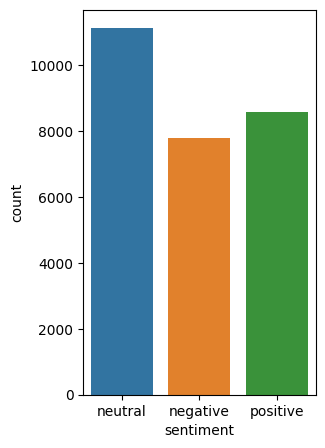

In [18]:
fig = plt.figure(figsize=(3,5))
sns.countplot(x='sentiment',data = df)

In [19]:
pos_tweets = df.loc[df['sentiment'] == 'positive', ['text', 'sentiment']]
pos_tweets.head()

,text,sentiment
6,2am feedings for the baby are fun when he is a...,positive
9,Journey!? Wow... u just became cooler. hehe....,positive
11,I really really like the song Love Story by Ta...,positive
21,Playing Ghost Online is really interesting. Th...,positive
25,"the free fillin` app on my ipod is fun, im add...",positive


In [20]:
neg_tweets = df.loc[df['sentiment'] == 'negative', ['text', 'sentiment']]
neg_tweets.head()

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
12,My Sharpie is running DANGERously low on ink,negative


In [21]:
neu_tweets = df.loc[df['sentiment'] == 'neutral', ['text', 'sentiment']]
neu_tweets.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
5,http://www.dothebouncy.com/smf - some shameles...,neutral
7,Soooo high,neutral
8,Both of you,neutral
10,"as much as i love to be hopeful, i reckon the...",neutral


## Fit CountVectorizer on the 'text' column

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [26]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

# Training the Dataset 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
     

In [28]:
print("size of x_train:", (x_train.shape))
print("size of y_train:", (y_train.shape))
print("size of x_test:", (x_test.shape))
print("size of y_test:", (y_test.shape))

size of x_train: (21984, 179901)
size of y_train: (21984,)
size of x_test: (5497, 179901)
size of y_test: (5497,)


## Using Logistic Regression for Accuracy score

In [29]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%". format(logreg_acc*100))

Test accuracy: 69.82%


## Confusion Matrix

In [32]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 974  518   70]
 [ 309 1651  270]
 [  61  431 1213]]


              precision    recall  f1-score   support

    negative       0.72      0.62      0.67      1562
     neutral       0.64      0.74      0.68      2230
    positive       0.78      0.71      0.74      1705

    accuracy                           0.70      5497
   macro avg       0.71      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497



## Thank You!